In [273]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob
from notebook.utils import resample_and_merge_csv, compute_rmse, compute_NRMSE, plot_line_graph

In [274]:

# Path to the folder containing the CSV files
folder_path = 'C:/Users/dell latitude 7400/Desktop\work/AI_Project_Setup/notebook/data/raw_data_from_API/*.csv'  

# Get a list of all CSV files in the folder
csv_files = glob.glob(folder_path)

# Create an empty list to store DataFrames from each CSV file
dataframes = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file, parse_dates=["DataDate"])
    dataframes.append(df)

dataframes[0]
dataframes[0]['DataDate'] = dataframes[0]['DataDate'] - pd.Timedelta(minutes=323)
id_one = dataframes[0]['DeviceID'][0]
dataframes[0].drop('DeviceID', axis=1, inplace=True)  # Drop the desired column
dataframes[0].head()

,DataDate,PM2_5,PM10
0,2023-09-30 00:07:00,24.0,27.0
1,2023-09-30 00:08:00,21.0,23.0
2,2023-09-30 00:09:00,22.0,24.0
3,2023-09-30 00:10:00,21.0,23.0
4,2023-09-30 00:11:00,22.0,24.0


In [275]:
id_one

'ENE00933'

In [276]:
dataframes[1]
dataframes[1]['DataDate'] = dataframes[1]['DataDate'] - pd.Timedelta(minutes=323)
id_two = dataframes[1]['DeviceID'][0]
dataframes[1].drop('DeviceID', axis=1, inplace=True)  # Drop the desired column
dataframes[1].head()

,DataDate,PM2_5,PM10
0,2023-09-30 00:23:00,21.0,23.0
1,2023-09-30 01:35:00,21.0,23.0
2,2023-09-30 01:36:00,21.0,23.0
3,2023-09-30 01:37:00,20.0,22.0
4,2023-09-30 01:38:00,19.0,21.0


In [277]:
id_two

'ENE00950'

In [278]:
dataframes[2]
dataframes[2]['DataDate'] = dataframes[2]['DataDate'] - pd.Timedelta(minutes=323)
id_three = dataframes[2]['DeviceID'][0]
dataframes[2].drop('DeviceID', axis=1, inplace=True)  # Drop the desired column
dataframes[2].head()

,DataDate,PM2_5,PM10
0,2023-09-30 00:07:00,18.0,20.0
1,2023-09-30 00:08:00,18.0,20.0
2,2023-09-30 00:09:00,15.0,17.0
3,2023-09-30 00:10:00,17.0,19.0
4,2023-09-30 00:11:00,17.0,19.0


In [279]:
id_three

'ENE00960'

In [280]:
Teledyne_file_path = 'C:/Users/dell latitude 7400/Desktop\work/AI_Project_Setup/notebook/data/Teledyne_Data/merged_Teledyne_data_weather_data.csv'  
Teledyne_df = pd.read_csv(Teledyne_file_path, parse_dates=["DataDate"])
Teledyne_df

,DataDate,RH,Temp,PM2.5
0,2023-10-01 17:54:00,100.50,26.80,7.276371
1,2023-10-01 17:55:00,100.50,26.79,7.128142
2,2023-10-01 17:56:00,100.50,26.79,7.118874
3,2023-10-01 17:57:00,100.50,26.79,7.077153
4,2023-10-01 17:58:00,100.50,26.77,7.055617
...,...,...,...,...
65514,2023-11-16 13:45:00,64.86,33.48,8.077689
65515,2023-11-16 13:46:00,64.28,33.71,8.080121
65516,2023-11-16 13:47:00,63.57,33.77,8.092282
65517,2023-11-16 13:48:00,64.45,33.74,8.092282


In [281]:
merge_Teledyne_Raw_Sensor_Data, missing_values = resample_and_merge_csv(dataframes[2], Teledyne_df)
print(missing_values)
merge_Teledyne_Raw_Sensor_Data.reset_index(inplace=True)
merge_Teledyne_Raw_Sensor_Data

PM2_5    0
PM10     0
RH       0
Temp     0
PM2.5    0
dtype: int64


,DataDate,PM2_5,PM10,RH,Temp,PM2.5
0,2023-10-01 17:54:00,2.0,2.0,100.50,26.80,7.276371
1,2023-10-01 17:55:00,3.0,3.0,100.50,26.79,7.128142
2,2023-10-01 17:56:00,2.0,2.0,100.50,26.79,7.118874
3,2023-10-01 17:57:00,4.0,4.0,100.50,26.79,7.077153
4,2023-10-01 17:58:00,3.0,3.0,100.50,26.77,7.055617
...,...,...,...,...,...,...
43743,2023-11-16 13:45:00,1.0,1.0,64.86,33.48,8.077689
43744,2023-11-16 13:46:00,1.0,1.0,64.28,33.71,8.080121
43745,2023-11-16 13:47:00,1.0,1.0,63.57,33.77,8.092282
43746,2023-11-16 13:48:00,1.0,1.0,64.45,33.74,8.092282


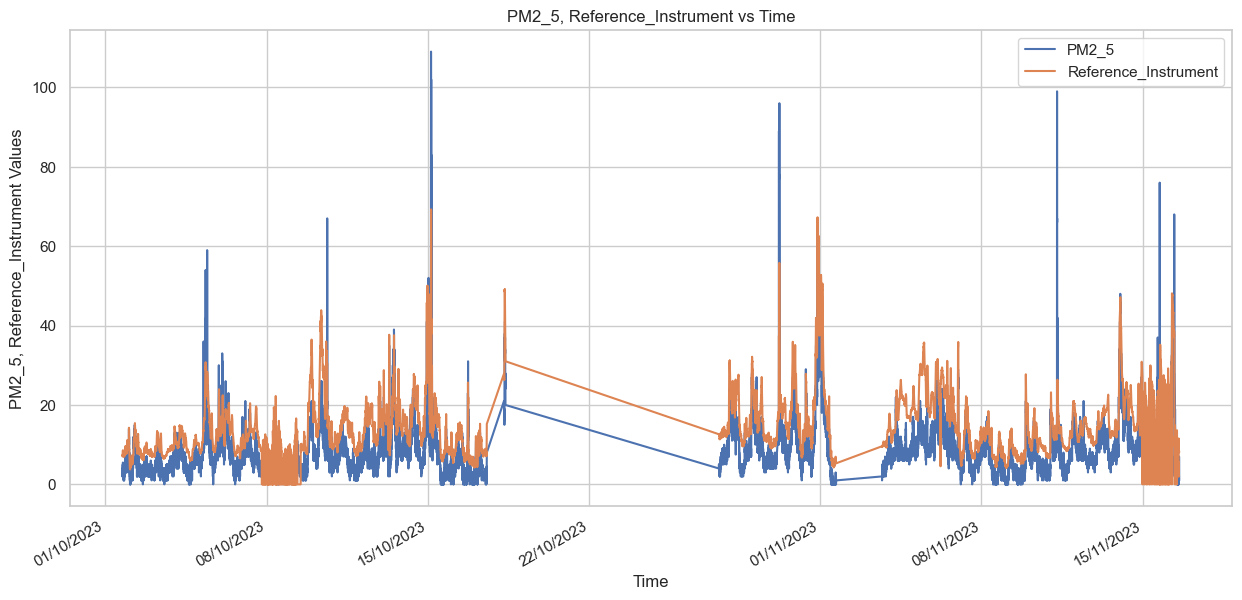

In [282]:
plot_line_graph(merge_Teledyne_Raw_Sensor_Data, 'DataDate', ['PM2_5', 'PM2.5'], ['PM2_5', 'Reference_Instrument'])

In [283]:
correlation = merge_Teledyne_Raw_Sensor_Data['PM2_5'].corr(merge_Teledyne_Raw_Sensor_Data['PM2.5'])
print(f"Correlation between PM2_5 and PM2.5: {correlation}")

Correlation between PM2_5 and PM2.5: 0.866294399151603


In [284]:
rmse_value = compute_rmse(merge_Teledyne_Raw_Sensor_Data, 'PM2_5', 'PM2.5')
print("RMSE:", rmse_value)

RMSE: 7.011598699865037


In [285]:
merge_Teledyne_Raw_Sensor_Data.to_csv(f'calibration_data_sets/merged_Teledyne_data_weather_data_{id_three}.csv', index=False)